# Consumo de Alcohol en Adolescentes
Siguiendo el libro "Aprende Machine Learning con Scikit-Learn, Keras y Tensorflow" Ejecutaré un proyecto de Machine Learning.

# Data Download


In [131]:
!kaggle datasets download -d uciml/student-alcohol-consumption

"kaggle" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [132]:
import zipfile

with zipfile.ZipFile('student-alcohol-consumption.zip', 'r') as zip_ref:
    zip_ref.extractall('student-alcohol-consumption')


# Data Overview

In [133]:
import pandas as pd
#Load the datasets
math_data = pd.read_csv('student-alcohol-consumption/student-mat.csv')
port_data = pd.read_csv('student-alcohol-consumption/student-por.csv')

print(math_data.head())
print(port_data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [134]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [135]:
port_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Merge

In [136]:
d1 = math_data
d2 = port_data

#Perform the merge
merge1 = pd.merge(d1, d2, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
print(f"Number of students in the merged dataset: {len(merge1)}")  # Should print 382


Number of students in the merged dataset: 382


In [137]:
# Further merge...
import numpy as np

# Make a copy of the original DataFrame to work on
df = merge1.copy()

# Variables to check for merging, including the new ones
variables_to_merge = ["traveltime", "studytime", "goout", "freetime", "health", "Dalc", "Walc", "famrel",
                      "guardian", "higher", "romantic", "schoolsup", "famsup", "activities"]

for var in variables_to_merge:
    x_col = f"{var}_x"
    y_col = f"{var}_y"
    
    # Check if the '_x' and '_y' columns have identical non-NaN values
    identical_mask = (df[x_col] == df[y_col]) | (df[x_col].isna() & df[y_col].isna())
    
    # For identical values, keep the value in a new column without '_x' or '_y' suffix
    # If values differ, the result is NaN
    df[var] = np.where(identical_mask, df[x_col], np.nan)
    
    # Drop the original '_x' and '_y' columns
    df.drop(columns=[x_col, y_col], inplace=True)

# Drop rows where '_x' and '_y' values were not identical
# This removes any row where at least one of the specified variables had differing '_x' and '_y' values
df.dropna(subset=variables_to_merge, inplace=True)

# Display the resulting DataFrame
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
376     MS   F   19       R     GT3       T     2     3  services     other   
377     MS   F   18       U     LE3       T     3     1   teacher  services   
379     MS   F   18       U     GT3       T     1     1     other     other   
380     MS   M   17       U     LE3       T     3     1  services  services   
381     MS   M   18       R     LE3       T     3     2  services     other   

     ... health  Dalc Walc famrel guardian  higher 

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 381
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      370 non-null    object 
 1   sex         370 non-null    object 
 2   age         370 non-null    int64  
 3   address     370 non-null    object 
 4   famsize     370 non-null    object 
 5   Pstatus     370 non-null    object 
 6   Medu        370 non-null    int64  
 7   Fedu        370 non-null    int64  
 8   Mjob        370 non-null    object 
 9   Fjob        370 non-null    object 
 10  reason      370 non-null    object 
 11  failures_x  370 non-null    int64  
 12  paid_x      370 non-null    object 
 13  nursery     370 non-null    object 
 14  internet    370 non-null    object 
 15  absences_x  370 non-null    int64  
 16  G1_x        370 non-null    int64  
 17  G2_x        370 non-null    int64  
 18  G3_x        370 non-null    int64  
 19  failures_y  370 non-null    int64 

### Value Counts of object types

In [139]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Value Counts for column {column}:\n{df[column].value_counts()}\n")

Value Counts for column school:
school
GP    331
MS     39
Name: count, dtype: int64

Value Counts for column sex:
sex
F    195
M    175
Name: count, dtype: int64

Value Counts for column address:
address
U    289
R     81
Name: count, dtype: int64

Value Counts for column famsize:
famsize
GT3    266
LE3    104
Name: count, dtype: int64

Value Counts for column Pstatus:
Pstatus
T    332
A     38
Name: count, dtype: int64

Value Counts for column Mjob:
Mjob
other       134
services     93
teacher      57
at_home      53
health       33
Name: count, dtype: int64

Value Counts for column Fjob:
Fjob
other       205
services    103
teacher      29
health       17
at_home      16
Name: count, dtype: int64

Value Counts for column reason:
reason
course        135
home          103
reputation     98
other          34
Name: count, dtype: int64

Value Counts for column paid_x:
paid_x
no     196
yes    174
Name: count, dtype: int64

Value Counts for column nursery:
nursery
yes    298
no      72
N

In [140]:
with pd.option_context('display.max_columns', None):
    print(df.describe())

              age        Medu        Fedu  failures_x  absences_x        G1_x  \
count  370.000000  370.000000  370.000000  370.000000  370.000000  370.000000   
mean    16.575676    2.800000    2.556757    0.278378    5.381081   10.891892   
std      1.180672    1.083505    1.086138    0.710599    7.665653    3.345375   
min     15.000000    0.000000    0.000000    0.000000    0.000000    3.000000   
25%     16.000000    2.000000    2.000000    0.000000    0.000000    8.000000   
50%     17.000000    3.000000    3.000000    0.000000    4.000000   11.000000   
75%     17.000000    4.000000    3.750000    0.000000    8.000000   13.000000   
max     22.000000    4.000000    4.000000    3.000000   75.000000   19.000000   

             G2_x        G3_x  failures_y  absences_y        G1_y        G2_y  \
count  370.000000  370.000000  370.000000  370.000000  370.000000  370.000000   
mean    10.751351   10.464865    0.132432    3.632432   12.135135   12.270270   
std      3.800986    4.6088

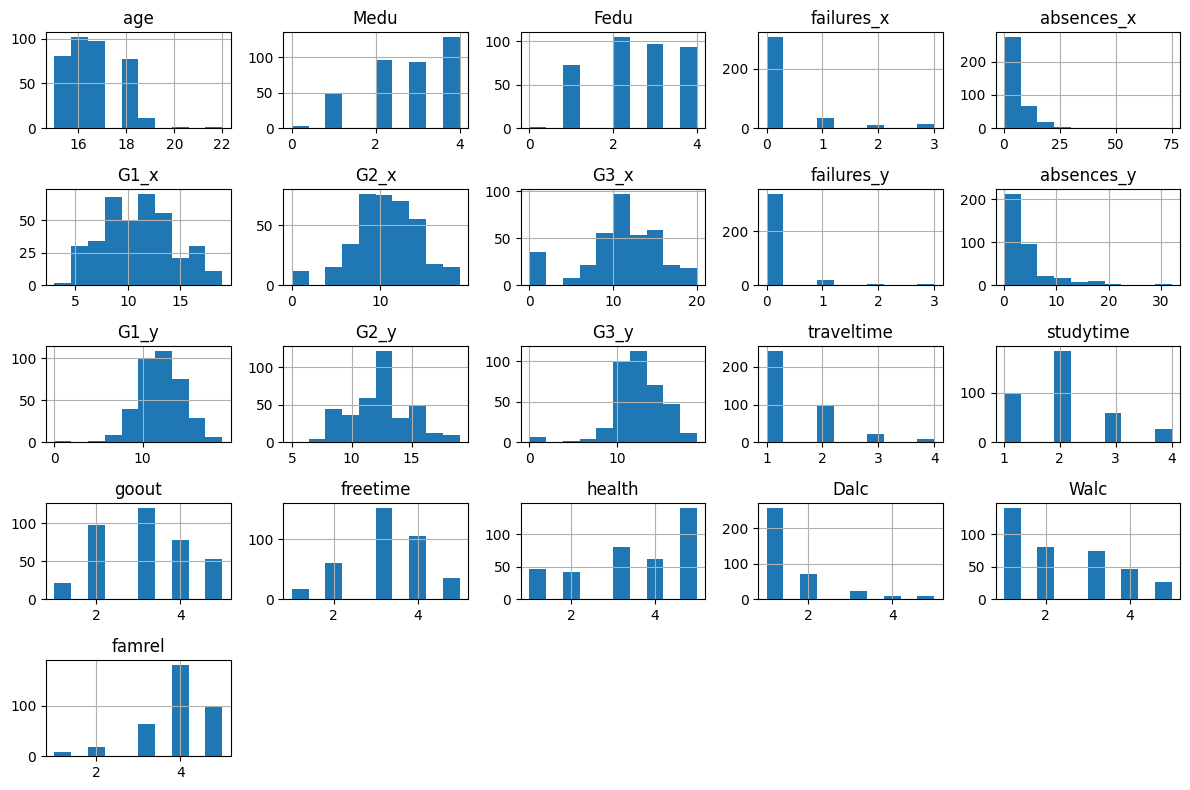

In [141]:
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number')

# Plot histograms for each numeric column
numeric_columns.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()


In [142]:
df_unprocessed = df.copy()

# Create Testing Sample

## Create a unique identifier to avoid contamination when the dataset gets updated

In [143]:
import hashlib

# Create a function to hash the values in each row
def hash_row(row):
    values = row.values
    hash_object = hashlib.md5(str(values).encode())
    return hash_object.hexdigest()

# Apply the hash function to create a unique identifier for each row
df['unique_id'] = df.apply(hash_row, axis=1)

# Print the dataframe with the unique identifier
print(df)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
376     MS   F   19       R     GT3       T     2     3  services     other   
377     MS   F   18       U     LE3       T     3     1   teacher  services   
379     MS   F   18       U     GT3       T     1     1     other     other   
380     MS   M   17       U     LE3       T     3     1  services  services   
381     MS   M   18       R     LE3       T     3     2  services     other   

     ... Dalc  Walc famrel guardian higher  romanti

## Stratify by sex

In [144]:
from sklearn.model_selection import train_test_split
# Stratify by the column 'sex' 
X = df.drop(columns=['sex'])  # Omit sex in x
y = df['sex']  # Use sex as the column to stratify by

#Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Combine X and y of training/test to reconstruct the complete sets
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)


### Include the hash to mantain consistency even if the dataset gets updated

In [145]:
def in_test_set(uid, test_ratio=0.2):
    return int(uid, 16) % 100 < test_ratio * 100

#Create a boolean mask for the test set
is_test = df['unique_id'].apply(in_test_set)

#Divide the DataFrame into training and test sets using the mask
train_set = df[~is_test]
test_set = df[is_test]

print(f"Training Set: {len(train_set)}, Test set: {len(test_set)}")


Training Set: 294, Test set: 76


In [146]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 381
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      294 non-null    object 
 1   sex         294 non-null    object 
 2   age         294 non-null    int64  
 3   address     294 non-null    object 
 4   famsize     294 non-null    object 
 5   Pstatus     294 non-null    object 
 6   Medu        294 non-null    int64  
 7   Fedu        294 non-null    int64  
 8   Mjob        294 non-null    object 
 9   Fjob        294 non-null    object 
 10  reason      294 non-null    object 
 11  failures_x  294 non-null    int64  
 12  paid_x      294 non-null    object 
 13  nursery     294 non-null    object 
 14  internet    294 non-null    object 
 15  absences_x  294 non-null    int64  
 16  G1_x        294 non-null    int64  
 17  G2_x        294 non-null    int64  
 18  G3_x        294 non-null    int64  
 19  failures_y  294 non-null    int64 

## Copias

In [147]:
train_set_copy=train_set.copy()
test_set_copy=test_set.copy()

train_set = train_set.drop(columns=['unique_id'])
test_set = test_set.drop(columns=['unique_id'])


# Data Pipeline

## Regresion lineal + k feature selection

In [148]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

# Identificar las columnas categóricas y numéricas
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'paid_x', 'paid_y', 'nursery', 'internet', 'higher', 'romantic', 'schoolsup', 'famsup', 'activities', 'Mjob', 'Fjob', 'reason', 'guardian']
numerical_columns = [col for col in train_set.columns if col not in categorical_columns + ['Walc', 'Dalc']]

# Crear transformadores para las columnas numéricas y categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escala las características numéricas
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Aplicar OneHotEncoder a variables categóricas
])

# Definir el transformador de columnas para aplicar las transformaciones adecuadas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# División del conjunto de prueba en prueba y validación
X_test_original, y_test_original = test_set.drop(['Walc', 'Dalc'], axis=1), test_set[['Walc', 'Dalc']]
X_test, X_validation, y_test, y_validation = train_test_split(X_test_original, y_test_original, test_size=0.5, random_state=42)

# Preparación de los conjuntos de entrenamiento
X_train = train_set.drop(['Walc', 'Dalc'], axis=1)
y_train_walc = train_set['Walc']
y_train_dalc = train_set['Dalc']

# Evaluar el modelo para 'Walc'
pipeline_walc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k=9)),  # Seleccionar las k mejores características
    ('regressor', LinearRegression())
])
scores_walc = cross_val_score(pipeline_walc, X_train, y_train_walc, cv=5, scoring='r2')
print("Resultados para 'Walc':")
print("R² scores:", scores_walc)
print("R² Mean:", np.mean(scores_walc))
print("R² Standard Deviation:", np.std(scores_walc))
print()

# Evaluar el modelo para 'Dalc'
pipeline_dalc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k=4)),  # Seleccionar las k mejores características
    ('regressor', LinearRegression())
])
scores_dalc = cross_val_score(pipeline_dalc, X_train, y_train_dalc, cv=5, scoring='r2')
print("Resultados para 'Walc':")
print("R² scores:", scores_dalc)
print("R² Mean:", np.mean(scores_dalc))
print("R² Standard Deviation:", np.std(scores_dalc))

Resultados para 'Walc':
R² scores: [0.19879192 0.21137284 0.25836368 0.24958615 0.05748815]
R² Mean: 0.1951205482051714
R² Standard Deviation: 0.0723691745584108

Resultados para 'Walc':
R² scores: [-0.19659161 -0.04433544  0.0660032  -0.00267093  0.07139871]
R² Mean: -0.021239214322397504
R² Standard Deviation: 0.09779540197798436


## Lasso Regression

In [149]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

# Identificar las columnas categóricas y numéricas
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'paid_x', 'paid_y', 'nursery', 'internet', 'higher', 'romantic', 'schoolsup', 'famsup', 'activities', 'Mjob', 'Fjob', 'reason', 'guardian']
numerical_columns = [col for col in train_set.columns if col not in categorical_columns + ['Walc', 'Dalc']]

# Crear transformadores para las columnas numéricas y categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escala las características numéricas
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Aplicar OneHotEncoder a variables categóricas
])

# Definir el transformador de columnas para aplicar las transformaciones adecuadas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# División del conjunto de prueba en prueba y validación
X_test_original, y_test_original = test_set.drop(['Walc', 'Dalc'], axis=1), test_set[['Walc', 'Dalc']]
X_test, X_validation, y_test, y_validation = train_test_split(X_test_original, y_test_original, test_size=0.5, random_state=42)

# Preparación de los conjuntos de entrenamiento
X_train = train_set.drop(['Walc', 'Dalc'], axis=1)
y_train_walc = train_set['Walc']
y_train_dalc = train_set['Dalc']

# Evaluar el modelo para 'Walc'
pipeline_walc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso)

])
scores_walc = cross_val_score(pipeline_walc, X_train, y_train_walc, cv=5, scoring='r2')
print("Resultados para 'Walc':")
print("R² scores:", scores_walc)
print("R² Mean:", np.mean(scores_walc))
print("R² Standard Deviation:", np.std(scores_walc))
print()

# Evaluar el modelo para 'Dalc'
pipeline_dalc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso)
])
scores_dalc = cross_val_score(pipeline_dalc, X_train, y_train_dalc, cv=5, scoring='r2')
print("Resultados para 'Dalc':")
print("R² scores:", scores_dalc)
print("R² Mean:", np.mean(scores_dalc))
print("R² Standard Deviation:", np.std(scores_dalc))

Resultados para 'Walc':
R² scores: [0.25156865 0.19166171 0.20883216 0.21814135 0.12139485]
R² Mean: 0.19831974155818724
R² Standard Deviation: 0.04312915892187532

Resultados para 'Dalc':
R² scores: [0.06952473 0.03953093 0.06863513 0.06122422 0.00552992]
R² Mean: 0.04888898641416724
R² Standard Deviation: 0.02423008231814969


## Decision Tree

In [150]:
# Import the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the Decision Tree models
decision_tree_walc = DecisionTreeRegressor(random_state=42)
decision_tree_dalc = DecisionTreeRegressor(random_state=42)

# Create pipelines for Decision Tree models
pipeline_dt_walc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', decision_tree_walc)
])
pipeline_dt_dalc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', decision_tree_dalc)
])

# Evaluate Decision Tree models
scores_dt_walc = cross_val_score(pipeline_dt_walc, X_train, y_train_walc, cv=5, scoring='r2')
scores_dt_dalc = cross_val_score(pipeline_dt_dalc, X_train, y_train_dalc, cv=5, scoring='r2')

# Print Decision Tree results
print("Decision Tree Results for 'Walc':")
print("R² scores:", scores_dt_walc)
print("R² Mean:", np.mean(scores_dt_walc))
print("R² Standard Deviation:", np.std(scores_dt_walc))
print()
print("Decision Tree Results for 'Dalc':")
print("R² scores:", scores_dt_dalc)
print("R² Mean:", np.mean(scores_dt_dalc))
print("R² Standard Deviation:", np.std(scores_dt_dalc))


Decision Tree Results for 'Walc':
R² scores: [-0.80323612 -0.36441959 -0.76562963 -0.32307108 -0.61702128]
R² Mean: -0.5746755374794951
R² Standard Deviation: 0.19900197708974313

Decision Tree Results for 'Dalc':
R² scores: [-0.14674441 -0.90986056 -1.29396802 -0.09338663 -0.28296467]
R² Mean: -0.5453848572616611
R² Standard Deviation: 0.4744049438409142


## SVM

In [151]:
# Import SVR
from sklearn.svm import SVR

# Instantiate the SVR models
svr_walc = SVR(kernel='linear')
svr_dalc = SVR(kernel='linear')

# Create pipelines for SVR models
pipeline_svr_walc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svr_walc)
])
pipeline_svr_dalc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svr_dalc)
])

# Evaluate SVR models
scores_svr_walc = cross_val_score(pipeline_svr_walc, X_train, y_train_walc, cv=5, scoring='r2')
scores_svr_dalc = cross_val_score(pipeline_svr_dalc, X_train, y_train_dalc, cv=5, scoring='r2')

# Print SVR results
print("SVR Results for 'Walc':")
print("R² scores:", scores_svr_walc)
print("R² Mean:", np.mean(scores_svr_walc))
print("R² Standard Deviation:", np.std(scores_svr_walc))
print()
print("SVR Results for 'Dalc':")
print("R² scores:", scores_svr_dalc)
print("R² Mean:", np.mean(scores_svr_dalc))
print("R² Standard Deviation:", np.std(scores_svr_dalc))


SVR Results for 'Walc':
R² scores: [0.43625461 0.00260105 0.09730342 0.047424   0.14493082]
R² Mean: 0.14570277919143182
R² Standard Deviation: 0.1529053849657937

SVR Results for 'Dalc':
R² scores: [-0.18159745 -0.07186584 -0.12074958  0.09584184 -0.05182871]
R² Mean: -0.06603994846864739
R² Standard Deviation: 0.09250761127466718


## Transform categoricals to numericals/Dummy
Ignore, doing scikit pipeline

### Test set, ignore, learning how to use a scikit pipeline

In [213]:
# binary_vars = {
#     "school": {"GP": 1, "MS": 0},
#     "sex": {"M": 1, "F": 0},
#     "address": {"U": 1, "R": 0},
#     "famsize": {"GT3": 1, "LE3": 0},
#     "Pstatus": {"T": 1, "A": 0},
#     "paid_x": {"yes": 1, "no": 0}, # Ensure these columns exist in your DataFrame
#     "paid_y": {"yes": 1, "no": 0}, # or adjust the names accordingly
#     "nursery": {"yes": 1, "no": 0},
#     "internet": {"yes": 1, "no": 0},
#     "higher": {"yes": 1, "no": 0},
#     "romantic": {"yes": 1, "no": 0},
#     "schoolsup": {"yes": 1, "no": 0},
#     "famsup": {"yes": 1, "no": 0},
#     "activities": {"yes": 1, "no": 0}
# }
# # Applying binary transformation to the test set
# for var, mapping in binary_vars.items():
#     if var in test_set.columns:
#         test_set.loc[:, var] = test_set[var].map(mapping).fillna(test_set[var])

# print(test_set.head())


   school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
5       1   1   16       1       0       1     4     3  services    other   
23      1   1   16       1       0       1     2     2     other    other   
29      1   1   16       1       1       1     4     4   teacher  teacher   
32      1   1   15       0       1       1     4     3   teacher  at_home   
34      1   1   16       1       1       1     3     2     other    other   

    ... health  Dalc Walc famrel guardian  higher  romantic  schoolsup  \
5   ...    5.0   1.0  2.0    5.0   mother       1         0          0   
23  ...    5.0   2.0  4.0    5.0   mother       1         0          0   
29  ...    5.0   5.0  5.0    4.0   mother       1         1          0   
32  ...    5.0   1.0  1.0    4.0   mother       1         1          0   
34  ...    5.0   1.0  1.0    5.0   mother       1         0          0   

    famsup  activities  
5        1           1  
23       1           1  
29       1       

In [214]:
# # List of columns to be transformed into dummy variables
# columns_to_dummy = ['Mjob', 'Fjob', 'reason', 'guardian']

# # Applying dummy variable transformation to the test set
# for column in columns_to_dummy:
#     dummies = pd.get_dummies(test_set[column], prefix=column)
#     # Drop the original column to avoid redundancy
#     test_set.drop(column, axis=1, inplace=True)
#     # Ensure that the test set has the same dummy variables as the training set
#     test_set = pd.concat([test_set, dummies], axis=1)

# # It's important to align test_set columns with train_set
# test_set = test_set.reindex(columns=train_set.columns, fill_value=0)

# print(test_set.head())


   school sex  age address famsize Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
5       1   1   16       1       0       1     4     3     0     0  ...   
23      1   1   16       1       0       1     2     2     0     0  ...   
29      1   1   16       1       1       1     4     4     0     0  ...   
32      1   1   15       0       1       1     4     3     0     0  ...   
34      1   1   16       1       1       1     3     2     0     0  ...   

    health  Dalc Walc famrel guardian  higher  romantic  schoolsup  famsup  \
5      5.0   1.0  2.0    5.0        0       1         0          0       1   
23     5.0   2.0  4.0    5.0        0       1         0          0       1   
29     5.0   5.0  5.0    4.0        0       1         1          0       1   
32     5.0   1.0  1.0    4.0        0       1         1          0       1   
34     5.0   1.0  1.0    5.0        0       1         0          0       1   

    activities  
5            1  
23           1  
29           1  
32          

### Training set, ignore, learning how to use a scikit pipeline

In [215]:
# # Ensure this code is added in a new cell in your Jupyter notebook

# for var, mapping in binary_vars.items():
#     if var in train_set.columns:
#         train_set.loc[:, var] = train_set[var].map(mapping).fillna(train_set[var])

# print(train_set.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0      1   0   18       1       1       0     4     4  at_home   teacher  ...   
1      1   0   17       1       1       1     1     1  at_home     other  ...   
2      1   0   15       1       0       1     1     1  at_home     other  ...   
3      1   0   15       1       1       1     4     2   health  services  ...   
4      1   0   16       1       1       1     3     3    other     other  ...   

  health  Dalc Walc famrel guardian  higher  romantic  schoolsup  famsup  \
0    3.0   1.0  1.0    4.0   mother       1         0          1       0   
1    3.0   1.0  1.0    5.0   father       1         0          0       1   
2    3.0   2.0  3.0    4.0   mother       1         0          1       0   
3    5.0   1.0  1.0    3.0   mother       1         1          0       1   
4    5.0   1.0  2.0    4.0   father       1         0          0       1   

   activities  
0           0  
1           0  
2       

In [216]:
# # List of columns to be transformed into dummy variables
# columns_to_dummy = ['Mjob', 'Fjob', 'reason', 'guardian']

# # Using pd.get_dummies() to transform the columns and add them back to the original DataFrame
# for column in columns_to_dummy:
#     dummies = pd.get_dummies(train_set[column], prefix=column)
#     # Drop the original column to avoid redundancy
#     train_set = train_set.drop(column, axis=1)
#     # Concatenate the new dummy columns to the original DataFrame
#     train_set = pd.concat([train_set, dummies], axis=1)

# # Display the first few rows of the updated DataFrame to verify the changes
# print(train_set.head())


  school sex  age address famsize Pstatus  Medu  Fedu  failures_x paid_x  ...  \
0      1   0   18       1       1       0     4     4           0      0  ...   
1      1   0   17       1       1       1     1     1           0      0  ...   
2      1   0   15       1       0       1     1     1           3      1  ...   
3      1   0   15       1       1       1     4     2           0      1  ...   
4      1   0   16       1       1       1     3     3           0      1  ...   

  Fjob_other Fjob_services  Fjob_teacher  reason_course  reason_home  \
0      False         False          True           True        False   
1       True         False         False           True        False   
2       True         False         False          False        False   
3      False          True         False          False         True   
4       True         False         False          False         True   

   reason_other  reason_reputation guardian_father  guardian_mother  \
0        

## Correlation

In [217]:
# Select columns for correlation matrix, excluding 'unique_id'
columns_for_correlation = train_set.columns[train_set.columns != 'unique_id']

# Compute the correlation matrix for the selected columns
corr_matrix = train_set[columns_for_correlation].corr()

# Display the correlation matrix
print(corr_matrix)


                     school       sex       age   address   famsize   Pstatus  \
school             1.000000  0.044214 -0.361500  0.304814  0.023438 -0.089671   
sex                0.044214  1.000000 -0.027568 -0.057696 -0.152032 -0.011016   
age               -0.361500 -0.027568  1.000000 -0.202872 -0.002101  0.040406   
address            0.304814 -0.057696 -0.202872  1.000000 -0.052511 -0.090430   
famsize            0.023438 -0.152032 -0.002101 -0.052511  1.000000  0.183933   
Pstatus           -0.089671 -0.011016  0.040406 -0.090430  0.183933  1.000000   
Medu               0.155340  0.044890 -0.123075  0.166459 -0.034314 -0.145983   
Fedu               0.075813  0.016997 -0.126638  0.066323  0.015680 -0.076703   
failures_x        -0.024207  0.079545  0.195462 -0.059214  0.002849 -0.019622   
paid_x             0.015207 -0.169144 -0.062176  0.012453 -0.013462  0.068177   
nursery            0.046301  0.020972 -0.048690  0.056693 -0.121037 -0.122123   
internet           0.095604 

### Dalc and Walc Correlations

In [218]:
# Extract and sort correlations for 'Dalc' (Daily alcohol consumption)
dalc_correlations = corr_matrix['Dalc'].sort_values(ascending=False)
print("Correlations of Daily Alcohol Consumption (Dalc):")
print(dalc_correlations, "\n")

# Extract and sort correlations for 'Walc' (Weekend alcohol consumption)
walc_correlations = corr_matrix['Walc'].sort_values(ascending=False)
print("Correlations of Weekend Alcohol Consumption (Walc):")
print(walc_correlations)


Correlations of Daily Alcohol Consumption (Dalc):
Dalc                 1.000000
Walc                 0.626206
goout                0.258823
sex                  0.245743
failures_y           0.221283
freetime             0.207043
traveltime           0.186904
age                  0.178072
absences_x           0.173672
absences_y           0.169774
failures_x           0.156556
reason_other         0.131194
Fjob_services        0.125242
paid_y               0.122865
internet             0.083477
reason_home          0.080344
Mjob_services        0.071467
paid_x               0.070598
health               0.049881
guardian_father      0.048641
Mjob_teacher         0.043393
Medu                 0.038992
guardian_other       0.035351
Fedu                 0.025817
Mjob_other          -0.006349
Pstatus             -0.007630
romantic            -0.014314
Fjob_health         -0.019911
schoolsup           -0.024795
Fjob_teacher        -0.030861
famsup              -0.034128
famrel              

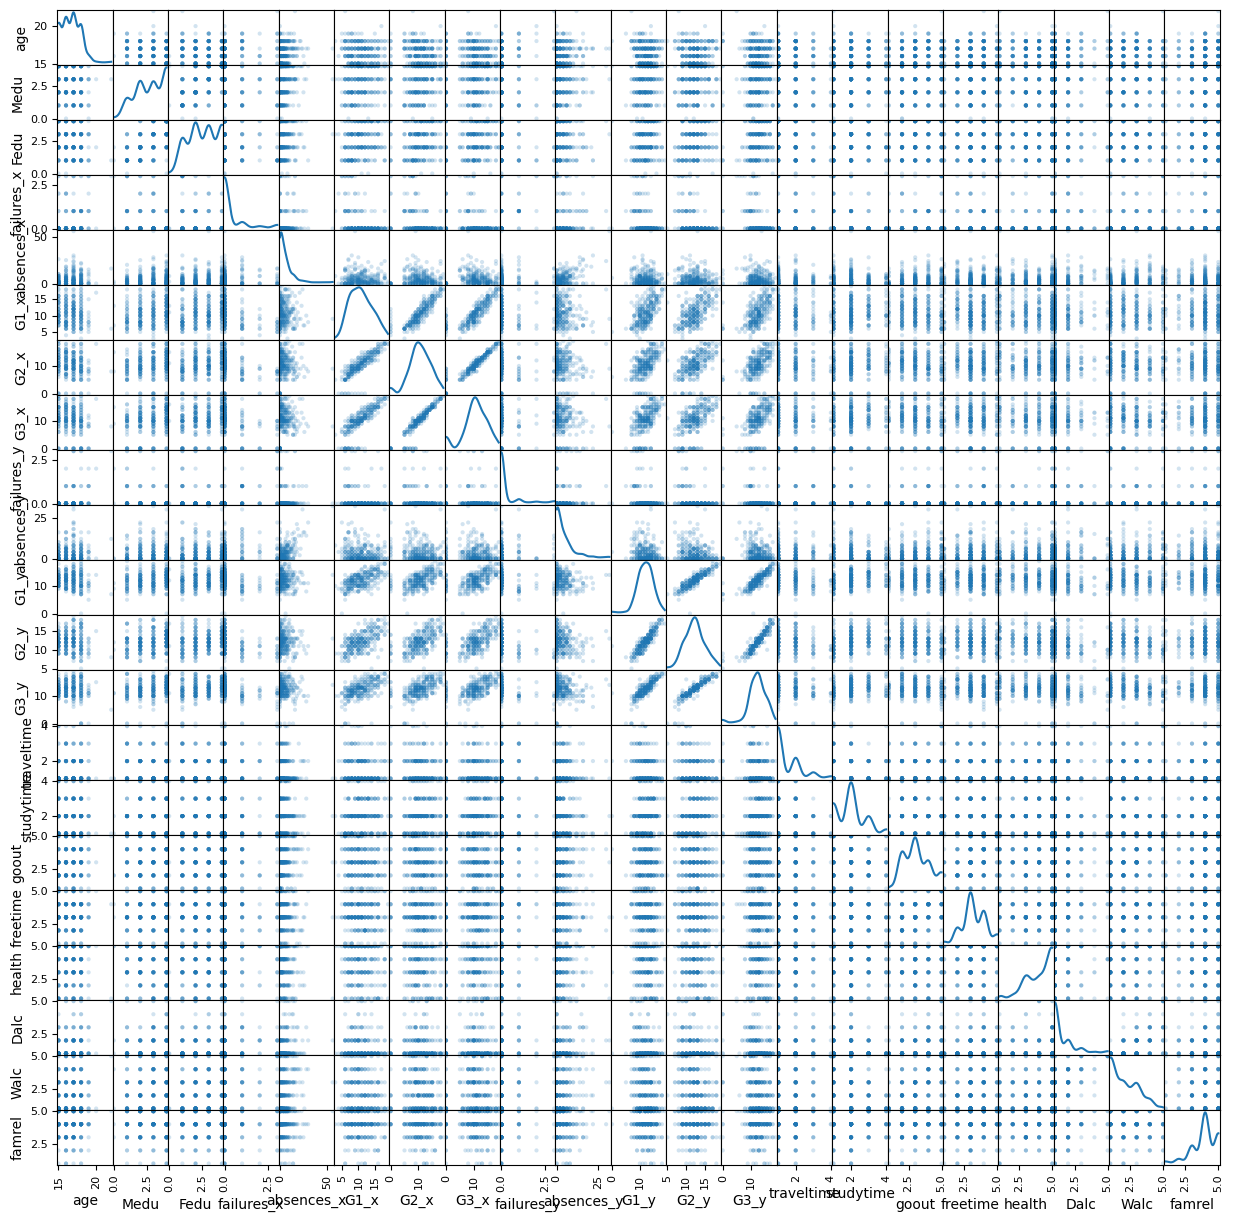

In [220]:
# Filter to include only numeric data types for the scatter matrix
numeric_train_set = train_set.select_dtypes(include=[np.number])

# Create a scatter matrix for all numeric variables in the filtered DataFrame
scatter_matrix(numeric_train_set, alpha=0.2, figsize=(15, 15), diagonal='kde')

# Display the plot
plt.show()



In [224]:
# Filter scatter_data to include only numeric columns for the scatter matrix
numeric_scatter_data = scatter_data.select_dtypes(include=[np.number])

# Create the scatter matrix for numeric columns only
scatter_matrix = pd.plotting.scatter_matrix(numeric_scatter_data, figsize=(12, 12), alpha=0.2, diagonal='kde')

# Rotate the x-axis labels
for ax in scatter_matrix.ravel():
    ax.xaxis.label.set_rotation(90)

# Optionally, rotate the y-axis labels for better readability
for ax in scatter_matrix.ravel():
    ax.yaxis.label.set_rotation(0)

# Adjust the layout
plt.tight_layout()

# Show the scatter matrix
plt.show()




TypeError: '<' not supported between instances of 'str' and 'int'

Error in callback <function _draw_all_if_interactive at 0x000001F60AE899E0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 